In [42]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
vix_2017 = pd.read_csv('/content/gdrive/My Drive/Bank Nifty/VIX/hist_india_vix_01-Jan-2017_31-Dec-2017.csv')
vix_2018 = pd.read_csv('/content/gdrive/My Drive/Bank Nifty/VIX/hist_india_vix_01-Jan-2018_31-Dec-2018.csv')
vix_2019 = pd.read_csv('/content/gdrive/My Drive/Bank Nifty/VIX/hist_india_vix_01-Jan-2019_31-Dec-2019.csv')
vix_2020 = pd.read_csv('/content/gdrive/My Drive/Bank Nifty/VIX/hist_india_vix_01-Jan-2020_31-Oct-2020.csv')

In [45]:
vix = pd.concat([vix_2017, vix_2018, vix_2019, vix_2020])

In [46]:
vix.columns 

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Prev. Close ', 'Change ',
       '% Change'],
      dtype='object')

In [47]:
vix.describe()

Open        High         Low   ...  Prev. Close      Change     % Change
count  920.000000  920.000000  920.000000  ...    920.000000  920.000000  920.000000
mean    17.553378   18.286435   15.819595  ...     17.553378    0.006761    0.161880
std      9.093127    9.593390    8.566915  ...      9.093127    1.284349    5.052247
min     10.447500   10.807500    8.755000  ...     10.447500   -8.230000  -29.770000
25%     12.979375   13.545625   11.476875  ...     12.979375   -0.420000   -2.630000
50%     14.926250   15.461250   13.172500  ...     14.926250   -0.050000   -0.260000
75%     17.948750   18.674375   16.157500  ...     17.948750    0.350000    2.300000
max     83.607500   86.635000   75.972500  ...     83.607500   11.620000   30.790000

[8 rows x 7 columns]

In [48]:
vix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 180
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          920 non-null    object 
 1   Open          920 non-null    float64
 2   High          920 non-null    float64
 3   Low           920 non-null    float64
 4   Close         920 non-null    float64
 5   Prev. Close   920 non-null    float64
 6   Change        920 non-null    float64
 7   % Change      920 non-null    float64
dtypes: float64(7), object(1)
memory usage: 64.7+ KB


In [49]:
vix['Date ']= pd.to_datetime(vix['Date '])

In [50]:
vix.reset_index(drop=True, inplace=True)
vix

Date     Open     High   ...  Prev. Close   Change   % Change
0   2017-01-02  15.4650  16.3750  ...       15.4650     0.37      2.36
1   2017-01-03  15.8300  16.4175  ...       15.8300     0.13      0.81
2   2017-01-04  15.9575  16.1000  ...       15.9575    -0.07     -0.42
3   2017-01-05  15.8900  15.8900  ...       15.8900    -0.84     -5.29
4   2017-01-06  15.0500  15.0875  ...       15.0500    -0.14     -0.91
..         ...      ...      ...  ...           ...      ...       ...
915 2020-09-14  20.7125  21.7400  ...       20.7125     0.48      2.31
916 2020-09-15  21.1900  21.1900  ...       21.1900    -0.59     -2.80
917 2020-09-16  20.5975  20.5975  ...       20.5975    -0.94     -4.55
918 2020-09-17  19.6600  20.6825  ...       19.6600     0.44      2.24
919 2020-09-18  20.1000  20.7700  ...       20.1000    -0.06     -0.27

[920 rows x 8 columns]

In [51]:
vix.columns = ['Date', 'Vix Open', 'Vix High', 'Vix Low', 'Vix Close', 'Vix Prev. Close', 'Vix Change','Vix % Change']

In [52]:
bnf_2017 = pd.read_csv('/content/gdrive/My Drive/Bank Nifty/BNF/BNF_01-Jan-2017_31-Dec-2017.csv')
bnf_2018 = pd.read_csv('/content/gdrive/My Drive/Bank Nifty/BNF/BNF_01-Jan-2018_31-Dec-2018.csv')
bnf_2019 = pd.read_csv('/content/gdrive/My Drive/Bank Nifty/BNF/BNF_01-Jan-2019_31-Dec-2019.csv')
bnf_2020 = pd.read_csv('/content/gdrive/My Drive/Bank Nifty/BNF/BNF_01-Jan-2020_31-Oct-2020.csv')

In [53]:
bnf = pd.concat([bnf_2017, bnf_2018, bnf_2019, bnf_2020])

In [54]:
bnf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 180
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               920 non-null    object 
 1   Open               920 non-null    float64
 2   High               920 non-null    float64
 3   Low                920 non-null    float64
 4   Close              920 non-null    float64
 5   Shares Traded      920 non-null    object 
 6   Turnover (Rs. Cr)  920 non-null    object 
dtypes: float64(4), object(3)
memory usage: 57.5+ KB


In [55]:
bnf.drop(['Shares Traded', 'Turnover (Rs. Cr)'], inplace = True, axis=1)

In [56]:
bnf['Date']= pd.to_datetime(bnf['Date'])

In [57]:
bnf['Prev. Close']=bnf['Close'].shift()

In [58]:
bnf['Prev. Close'].fillna(18177.20, inplace = True)
bnf.reset_index(drop=True, inplace=True)

In [59]:
bnf['Gap'] = bnf['Open'] - bnf['Prev. Close']
bnf['% Gap'] = round((bnf['Open']-bnf['Prev. Close'])/bnf['Prev. Close']*100,2)
bnf['Abs % Gap'] = abs(round((bnf['Open']-bnf['Prev. Close'])/bnf['Prev. Close']*100,2))

In [60]:
def three_percent(num):
    if num>=3:
        return("Gap greater than +-3%")
    else:
        return('Gap less than +-3%')

In [61]:
def two_percent(num):
    if num>=2:
        return("Gap greater than +-2%")
    else:
        return('Gap less than +-2%')

In [62]:
def one_percent(num):
    if num>=1:
        return("Gap greater than +-1%")
    else:
        return('Gap less than +-1%')

In [63]:
bnf['+-3% Gap']= bnf['Abs % Gap'].apply(lambda x: three_percent(x))
bnf['+-2% Gap']= bnf['Abs % Gap'].apply(lambda x: two_percent(x))
bnf['+-1% Gap']= bnf['Abs % Gap'].apply(lambda x: one_percent(x))

In [64]:
bnf

Date      Open  ...            +-2% Gap            +-1% Gap
0   2017-01-02  18242.30  ...  Gap less than +-2%  Gap less than +-1%
1   2017-01-03  18002.75  ...  Gap less than +-2%  Gap less than +-1%
2   2017-01-04  18037.45  ...  Gap less than +-2%  Gap less than +-1%
3   2017-01-05  18000.75  ...  Gap less than +-2%  Gap less than +-1%
4   2017-01-06  18168.45  ...  Gap less than +-2%  Gap less than +-1%
..         ...       ...  ...                 ...                 ...
915 2020-09-14  22683.35  ...  Gap less than +-2%  Gap less than +-1%
916 2020-09-15  22202.80  ...  Gap less than +-2%  Gap less than +-1%
917 2020-09-16  22476.30  ...  Gap less than +-2%  Gap less than +-1%
918 2020-09-17  22352.00  ...  Gap less than +-2%  Gap less than +-1%
919 2020-09-18  22439.35  ...  Gap less than +-2%  Gap less than +-1%

[920 rows x 12 columns]

In [65]:
vix.columns

Index(['Date', 'Vix Open', 'Vix High', 'Vix Low', 'Vix Close',
       'Vix Prev. Close', 'Vix Change', 'Vix % Change'],
      dtype='object')

In [66]:
bnf_vix = pd.merge(bnf, vix[['Date', 'Vix Open', 'Vix High', 'Vix Low', 'Vix Close']], on='Date')

In [67]:
vix.head(250)

Date  Vix Open  Vix High  ...  Vix Prev. Close  Vix Change  Vix % Change
0   2017-01-02   15.4650   16.3750  ...          15.4650        0.37          2.36
1   2017-01-03   15.8300   16.4175  ...          15.8300        0.13          0.81
2   2017-01-04   15.9575   16.1000  ...          15.9575       -0.07         -0.42
3   2017-01-05   15.8900   15.8900  ...          15.8900       -0.84         -5.29
4   2017-01-06   15.0500   15.0875  ...          15.0500       -0.14         -0.91
..         ...       ...       ...  ...              ...         ...           ...
245 2017-12-27   12.0525   12.7350  ...          12.0525        0.44          3.65
246 2017-12-28   12.4925   12.6925  ...          12.4925       -0.20         -1.56
247 2017-12-29   12.2975   12.7600  ...          12.2975        0.37          3.03
248 2018-01-01   12.6700   13.6125  ...          12.6700        0.68          5.39
249 2018-01-02   13.3525   13.8425  ...          13.3525        0.33          2.49

[250 rows x 8 columns]

In [68]:
bnf_vix.head(250)

Date      Open      High  ...  Vix High  Vix Low  Vix Close
0   2017-01-02  18242.30  18249.00  ...   16.3750  14.6400    15.8300
1   2017-01-03  18002.75  18115.05  ...   16.4175  14.9025    15.9575
2   2017-01-04  18037.45  18092.85  ...   16.1000  14.8975    15.8900
3   2017-01-05  18000.75  18164.05  ...   15.8900  14.4475    15.0500
4   2017-01-06  18168.45  18325.50  ...   15.0875  13.9225    14.9125
..         ...       ...       ...  ...       ...      ...        ...
245 2017-12-27  25652.85  25733.20  ...   12.7350  11.5100    12.4925
246 2017-12-28  25463.60  25561.95  ...   12.6925  11.3275    12.2975
247 2017-12-29  25484.85  25566.40  ...   12.7600  11.4800    12.6700
248 2018-01-01  25565.75  25588.00  ...   13.6125  12.5450    13.3525
249 2018-01-02  25382.20  25425.50  ...   13.8425  12.6050    13.6850

[250 rows x 16 columns]

In [69]:
vix_above_25 = bnf_vix[bnf_vix['Vix Open']>=25]

In [80]:
vix_above_25.head(250)

Date      Open      High  ...  Vix High  Vix Low  Vix Close
578 2019-05-07  29749.55  29835.50  ...   26.8100  23.0925    26.4775
579 2019-05-08  29261.30  29261.30  ...   27.0250  23.2450    26.3650
580 2019-05-09  28893.95  29040.30  ...   26.4950  23.4850    25.4850
581 2019-05-10  28927.60  29202.85  ...   26.5250  24.5350    26.3350
582 2019-05-13  29026.65  29049.05  ...   28.0625  23.7125    27.3825
..         ...       ...       ...  ...       ...      ...        ...
872 2020-07-15  21634.25  21935.50  ...   26.6375  23.7400    26.2900
873 2020-07-16  21453.25  21671.25  ...   26.5975  25.2450    25.3625
874 2020-07-17  21608.05  22065.00  ...   25.5025  23.7700    24.1575
881 2020-07-28  21940.15  22233.00  ...   25.2150  23.5450    23.6425
886 2020-08-04  21248.25  21576.35  ...   25.1850  23.5550    23.8150

[101 rows x 16 columns]

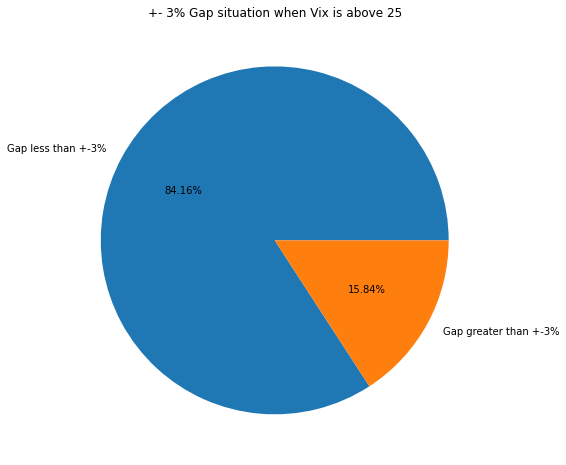

In [71]:
plt.figure(figsize=(10,8))
vix_above_25['+-3% Gap'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("+- 3% Gap situation when Vix is above 25")
plt.ylabel('')
plt.show()

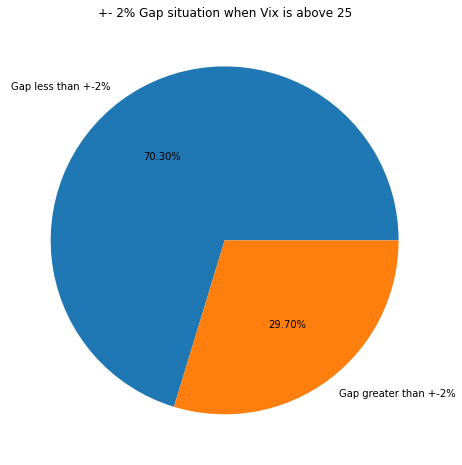

In [72]:
plt.figure(figsize=(10,8))
vix_above_25['+-2% Gap'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("+- 2% Gap situation when Vix is above 25")
plt.ylabel('')
plt.show()

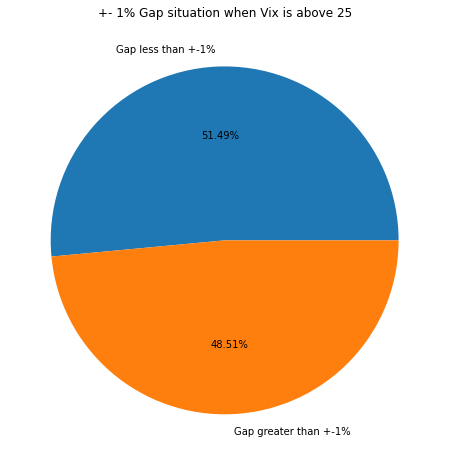

In [73]:
plt.figure(figsize=(10,8))
vix_above_25['+-1% Gap'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("+- 1% Gap situation when Vix is above 25")
plt.ylabel('')
plt.show()

In [74]:
vix_below_25 = bnf_vix[bnf_vix['Vix Open']<25]

In [75]:
vix_below_25

Date      Open      High  ...  Vix High  Vix Low  Vix Close
0   2017-01-02  18242.30  18249.00  ...   16.3750  14.6400    15.8300
1   2017-01-03  18002.75  18115.05  ...   16.4175  14.9025    15.9575
2   2017-01-04  18037.45  18092.85  ...   16.1000  14.8975    15.8900
3   2017-01-05  18000.75  18164.05  ...   15.8900  14.4475    15.0500
4   2017-01-06  18168.45  18325.50  ...   15.0875  13.9225    14.9125
..         ...       ...       ...  ...       ...      ...        ...
915 2020-09-14  22683.35  22757.30  ...   21.7400  17.5325    21.1900
916 2020-09-15  22202.80  22514.15  ...   21.1900  18.8975    20.5975
917 2020-09-16  22476.30  22659.40  ...   20.5975  16.3250    19.6600
918 2020-09-17  22352.00  22504.45  ...   20.6825  17.5525    20.1000
919 2020-09-18  22439.35  22469.40  ...   20.7700  17.5825    20.0450

[819 rows x 16 columns]

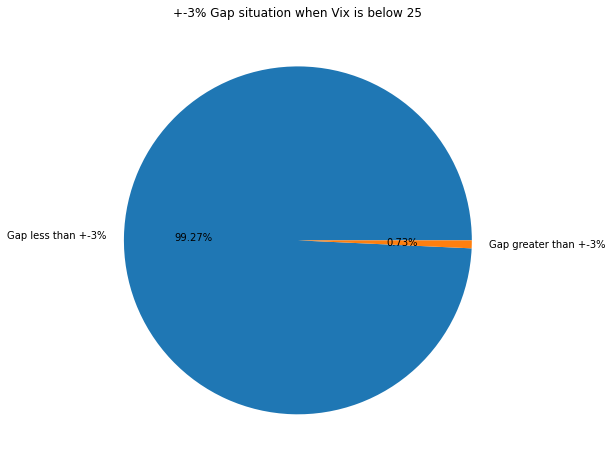

In [76]:
plt.figure(figsize=(10,8))
vix_below_25['+-3% Gap'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("+-3% Gap situation when Vix is below 25")
plt.ylabel('')
plt.show()

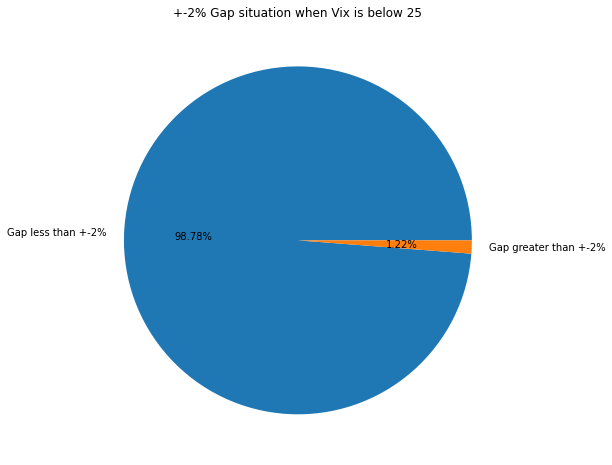

In [77]:
plt.figure(figsize=(10,8))
vix_below_25['+-2% Gap'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("+-2% Gap situation when Vix is below 25")
plt.ylabel('')
plt.show()

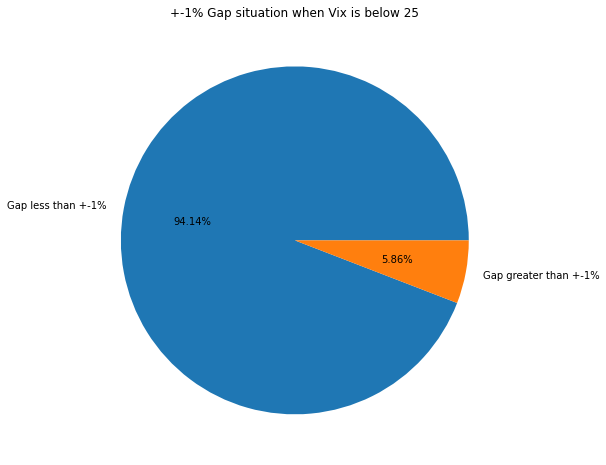

In [78]:
plt.figure(figsize=(10,8))
vix_below_25['+-1% Gap'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("+-1% Gap situation when Vix is below 25")
plt.ylabel('')
plt.show()

In [79]:
bnf_vix.to_csv('/content/gdrive/My Drive/Bank Nifty/BNF/Banknifty and Vix since 1st Jan 2017.csv')